# Case Study
## 분석주제 : 취업률 관점에서의 대학정보공시 정량지표 분석
### 대학의 핵심성과지표인 취업률과 대학정보공시 지표 간의 상관관계를 분석하여 취업률 향상을 위한 시사점 도출
## 분석대상 데이터셋은 2014년 전문대학 정보공시 데이터이다. 원천 데이터는 총 13개의 대학정보공시 정량지표로 구성되어 있으며, 전국의 모든 전문대학을 대상으로 한다. 분석대상 정량지표들은 다음과 같다.
### 학생충원률(sc1), 중도탈락학생비율(sc2), 학생1인당장학금(sc3), 장학금수혜율(sc4), 학자금대출이용학생비율(sc5), 학생1인당교육비(sc6), 전임교원1인당학생수(sc7), 전임교원강의담당비율(sc8), 업체당실습학생수평균(sc9), 현장실습이수율(sc10), 캡스톤디자인이수비율(sc11), 캡스톤디자인학생당지원금액(sc12), 취업률 (이상 13개 지표)
### 데이터 원본 : (원본)전문대학정보공시데이터.xlsx
### 원본 투플수 : 137개

In [1]:
# ch6.py
import pandas as pd
import numpy as np

# 데이터로드 (ch5-2(국내대학현황).csv : 데이터 원본 파일)
# encoding : 윈도우즈 환경에서의 한글 처리
# engine : python 3.6에서 한글이 포함된 파일이름 사용
rawData = pd.read_csv('.jupyter/ch6(전문대학정보공시데이터).csv', encoding='CP949', engine='python')

In [2]:
rawData

,seq,sc1,sc2,sc3,sc4,sc5,sc6,sc7,sc8,sc9,sc10,sc11,sc12,tc
0,1,0.96,0.10,2912.2,51.0,18.2,8829.7,32.8,51.6,2.7,0.16,NaN,NaN,0.68
1,2,0.97,0.06,2367.7,39.7,23.1,8402.7,35.8,39.9,3.1,0.51,NaN,NaN,0.59
2,3,1.02,0.04,2879.0,49.2,22.9,8418.4,33.2,52.2,2.7,0.17,1.00,67.0,0.59
3,4,1.01,0.10,2410.4,49.2,21.5,7435.5,36.7,40.8,3.1,0.35,NaN,NaN,0.61
4,5,0.95,0.06,2231.9,89.1,9.9,9234.3,32.4,36.3,2.8,0.33,NaN,NaN,0.49
5,6,1.30,0.08,1992.1,32.2,16.8,9234.3,37.9,41.8,3.0,0.61,0.63,249.0,0.87
6,7,1.24,0.08,2350.4,35.8,19.9,9911.8,39.5,37.8,2.5,0.59,0.70,42.0,0.68
7,8,0.96,0.14,2070.5,69.1,8.1,9351.0,34.3,39.1,2.4,0.54,1.00,107.0,0.65
8,9,1.08,0.06,1784.5,62.9,14.8,7566.6,39.6,38.9,2.4,0.78,0.67,76.0,0.73
9,10,1.19,0.08,3105.9,49.8,21.8,8991.0,39.1,43.9,2.9,0.27,0.88,298.0,0.72


In [3]:
# 결측치(NULL값) 제거 : 결측치를 해당 속성의 평균값으로 채우는 방법 채택
rawData_missing_fill_mean = rawData.fillna(rawData.mean())

# Z-score 정규화
# sklearn.preprocessing의 StandardScaler 모듈 임포트
from sklearn.preprocessing import StandardScaler

# StandardScaler() : Z-score 정규화 함수
stdscaler = StandardScaler()

# Z-score 정규화 수행 및 데이터프레임 생성
rawData_std = pd.DataFrame(stdscaler.fit_transform(rawData_missing_fill_mean.loc[:, 'sc1' : 'tc']),
                           columns=['sc1_n', 'sc2_n', 'sc3_n', 'sc4_n', 'sc5_n', 'sc6_n', 'sc7_n', 'sc8_n', 'sc9_n',
                                    'sc10_n', 'sc11_n', 'sc12_n', 'tc_n'])

rawData_std

,sc1_n,sc2_n,sc3_n,sc4_n,sc5_n,sc6_n,sc7_n,sc8_n,sc9_n,sc10_n,sc11_n,sc12_n,tc_n
0,-0.534049,0.812002,7.991725e-01,5.038228e-01,-0.322650,-1.642371e-02,-0.763615,0.730818,-3.005434e-01,-0.515764,-6.423680e-16,3.999150e-16,0.610718
1,-0.480133,-0.524266,-5.226843e-01,-5.513352e-01,0.600603,-2.015403e-01,-0.107034,-0.693405,5.134282e-01,0.865079,-6.423680e-16,3.999150e-16,-0.208668
2,-0.210550,-1.192399,7.185744e-01,3.357446e-01,0.562919,-1.947339e-01,-0.676071,0.803855,-3.005434e-01,-0.476312,1.312101e+00,-8.689827e-01,-0.208668
3,-0.264466,0.812002,-4.190235e-01,3.357446e-01,0.299132,-6.208490e-01,0.089940,-0.583849,5.134282e-01,0.233836,-6.423680e-16,3.999150e-16,-0.026582
4,-0.587966,-0.524266,-8.523595e-01,4.061479e+00,-1.886528,1.589819e-01,-0.851159,-1.131627,-9.705046e-02,0.154931,-6.423680e-16,3.999150e-16,-1.119096
5,1.299113,0.143868,-1.434511e+00,-1.251661e+00,-0.586437,1.589819e-01,0.352573,-0.462121,3.099353e-01,1.259605,-8.286954e-01,1.691895e+00,2.340533
6,0.975614,0.143868,-5.646827e-01,-9.155047e-01,-0.002338,4.526973e-01,0.702749,-0.949034,-7.075292e-01,1.180700,-4.236798e-01,-1.220752e+00,0.610718
7,-0.534049,2.148269,-1.244183e+00,2.193943e+00,-2.225682,2.095746e-01,-0.435324,-0.790787,-9.110221e-01,0.983437,1.312101e+00,-3.061524e-01,0.337590
8,0.112949,-0.524266,-1.938491e+00,1.615007e+00,-0.963275,-5.640134e-01,0.724635,-0.815133,-9.110221e-01,1.930301,-5.972579e-01,-7.423459e-01,1.065933
9,0.706031,0.143868,1.269409e+00,3.917707e-01,0.355658,5.350441e-02,0.615205,-0.206491,1.064424e-01,-0.081785,6.177887e-01,2.381362e+00,0.974890


### Z-score 기법으로 데이터를 정규화한 결과
### 정규화 수행 전에 결측치(NULL값)은 속성의 평균값으로 대체하여 제거(2.1절 참조)
### sc1_n : sc1 속성의 Z-score 정규화(표준화)된 속성 (다른 속성도 마찬가지 방식으로 정규화된 속성명을 명명함)

In [4]:
# 상관계수 분석 ( 정보공시지표 vs. 취업률 )
# col_names : 정보공시지표명을 저장하는 리스트
col_names = ["학생충원율", "중도탈락학생비율", "1인당장학금", "장학금수혜율",
             "학자금대출 이용학생비율", "학생1인당 교육비", "전임교원1인당 학생수",
             "전임교원강의담당비율", "업체당 실습학생수평균",
             "현장실습이수율", "캡스톤디자인이수비율", "캡스톤디자인학생당지원금액", "취업률"]
print("-- 상관계수(정보공시지표 vs. 취업률) --")

# 정보공시지표 각각에 대하여 취업률과의 상관분석 수행 (지표값은 정규화된 값을 사용)
# rawData_std : 정규화된 정보공시지표값을 저장하고 있는 데이터프레임 (이전 예제에서 생성함)
# NUM_OF_VAR : 변수(지표)의 총 개수(종속변수 취업률 포함)를 저장 (파이썬 변수이나 상수처럼 사용할 것)
NUM_OF_VAR = 13
for i in range(0, NUM_OF_VAR-1) :
    corr = np.corrcoef(rawData_std.iloc[:, i], rawData_std.iloc[:, NUM_OF_VAR-1])  # 12는 13번째 컬럼으로 취업률을 의미
    print("(" + col_names[i] + " vs. " + col_names[NUM_OF_VAR-1] + ") : %.3f" % (corr[0][1]))
    

-- 상관계수(정보공시지표 vs. 취업률) --
(학생충원율 vs. 취업률) : 0.353
(중도탈락학생비율 vs. 취업률) : -0.126
(1인당장학금 vs. 취업률) : 0.020
(장학금수혜율 vs. 취업률) : 0.138
(학자금대출 이용학생비율 vs. 취업률) : -0.264
(학생1인당 교육비 vs. 취업률) : 0.217
(전임교원1인당 학생수 vs. 취업률) : 0.093
(전임교원강의담당비율 vs. 취업률) : 0.131
(업체당 실습학생수평균 vs. 취업률) : 0.012
(현장실습이수율 vs. 취업률) : 0.351
(캡스톤디자인이수비율 vs. 취업률) : -0.043
(캡스톤디자인학생당지원금액 vs. 취업률) : 0.073


### 각 정보공시지표와 취업률 간의 상관계수를 구한 결과
### np.corrcoef() : 인수로 사용된 두 속성 간의 상관계수를 구하는 파이썬 Numpy 패키지 함수(3.1절 참조) 

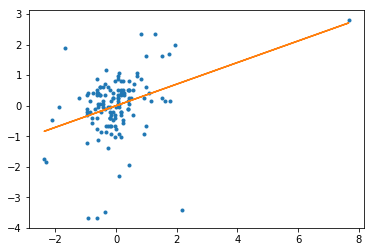

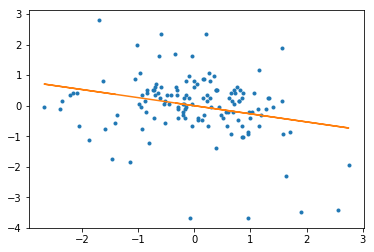

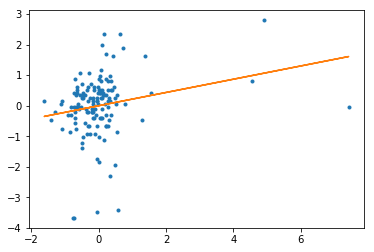

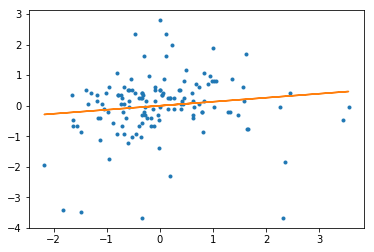

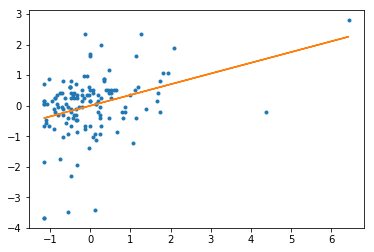

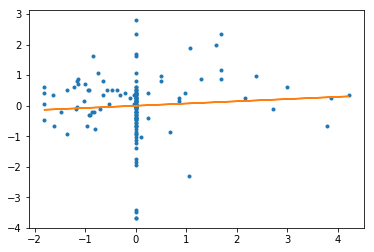

In [6]:
# 후보변수로 채택된 정보공시지표 추출
# 0 : 학생충원율(sc1), 4 : 학자금대출 이용학생비율(sc5), 5 : 학생1인당 교육비(sc6),
# 7 : 전임교원강의담당비율(sc8), 9 : 현장실습이수율(sc10), 12 : 취업률(tc)
# rawData_std : 정규화된 정보공시지표값을 저장하고 있는 데이터프레임 (이전 예제에서 생성함)
rawData_candi = rawData_std.iloc[:, [0, 4, 5, 7, 9, 11, 12]]

# NUM_OF_VAR_CANDI : 후보 독립변수(지표)와 종속변수(취업률)의 총 변수 개수를 저장 (파이썬 변수이나 상수처럼 사용할 것)
NUM_OF_VAR_CANDI = 7

# col_names : 정보공시지표명을 저장하고 있는 문자열 리스트 (이전 예제에서 생성함)
col_names_candi = []
col_names_candi.append(col_names[0])  # 후보 독립변수 : 학생충원율
col_names_candi.append(col_names[4])  # 후보 독립변수 : 학자금대출 이용학생비율
col_names_candi.append(col_names[5])  # 후보 독립변수 : 학생1인당 교육비
col_names_candi.append(col_names[7])  # 후보 독립변수 : 전임교원강의담당비율
col_names_candi.append(col_names[9])  # 후보 독립변수 : 현장실습이수율
col_names_candi.append(col_names[11]) # 후보 독립변수 : 캡스톤디자인학생당지원금액
col_names_candi.append(col_names[12]) # 종속 독립변수 : 취업률

# 후보변수와 취업률 간 선형회귀분석
from scipy import stats  # 선형회귀분석을 위한 scipy 패키지 중 stats 모듈 임포트
import matplotlib.pyplot as plt # 선형회귀 분석결과 시각화를 위한 패키지 임포트

for i in range(0, NUM_OF_VAR_CANDI-1) : # len(rawData_candi)-1
    # stats.linregress(x, y) : y = slope * x + intercept 형식의 선형함수를 찾아주는 stats 모듈 함수로 다섯 개의 값을 반환
    slope, intercept, r_value, p_value, std_err = stats.linregress(rawData_candi.iloc[:, i],
                                                     rawData_candi.iloc[:, NUM_OF_VAR_CANDI-1])

    # 회귀분석결과 시각화 (그래프 생성)
    plt.plot(rawData_candi.iloc[:, i], rawData_candi.iloc[:, NUM_OF_VAR_CANDI-1], '.')  # 산점도 그래프
    plt.plot(rawData_candi.iloc[:, i], np.array(rawData_candi.iloc[:, i]) * slope + intercept)  # 선형 그래프
    plt.show()    

### 지표그룹 별로 상관분석 결과 상관도가 상위인 변수(지표)를 후보 독립변수로 삼음([도표 6-4] 참조) 
#### 총 12개의 독립변수 중 6개를 후보변수로 삼음
### 후보변수 각각과 종속변수인 취업률과의 선형회귀분석을 수행
#### linregress(x,y) :  x를 독립변수로 y를 종속변수로 하는 선형회귀분석을 수행하는 파이썬 scipy 패키지 함수(2.1, 2.2절 참조)
#### 선형회귀분석 결과는 matplotlib 패키지의 plot() 함수를 이용하여 산점도와 선형 그래프를 동시에 표현하였다.